# Recovering Code

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

X_trian = mnist.train.images
y_train = mnist.train.labels

X_vali = mnist.validation.images
y_vali = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


### Building Model

In [2]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W_1 = tf.Variable(tf.zeros([784, 10]))
b_1 = tf.Variable(tf.zeros([10]))
y_pred = tf.nn.softmax(tf.matmul(x, W_1) + b_1)

loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

correct_preds = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

### Printing error rates

In [3]:
with tf.Session() as sess:
    tf.train.Saver().restore(sess, '../models/TF_Linear.checkpoint')
    train_error = []
    for j in range(11):
        train_error.append(1-accuracy.eval(feed_dict={x: mnist.train.images[j*5000:(j+1) * 5000], y: mnist.train.labels[j*5000:(j+1) * 5000]}))
    train_error = np.mean(train_error)
    test_error = 1 - accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels})

    print("train error = {:.6f}, test error = {:.6f}".format(train_error, test_error))

INFO:tensorflow:Restoring parameters from ../models/TF_Linear.checkpoint
train error = 0.066200, test error = 0.073200


### Printing confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix
with tf.Session() as sess:
    tf.train.Saver().restore(sess, '../models/TF_Linear.checkpoint')
    for j in range(11):
        train_pred = np.argmax(y_pred.eval(feed_dict={x: mnist.train.images[j*5000:(j+1) * 5000], y: mnist.train.labels[j*5000:(j+1) * 5000]}), axis=1)
        train_labels = np.argmax(mnist.train.labels[j*5000:(j+1) * 5000], axis=1)

        if j == 0:
            train_confuse = confusion_matrix(train_labels, train_pred)
        else:
            train_confuse += confusion_matrix(train_labels, train_pred)
    test_pred = np.argmax(y_pred.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}), axis=1)
    test_labels = np.argmax(mnist.test.labels, axis=1)
    test_confuse = confusion_matrix(test_labels, test_pred)


INFO:tensorflow:Restoring parameters from ../models/TF_Linear.checkpoint


In [5]:
train_confuse

array([[5304,    1,   12,    7,   12,   30,   31,    7,   36,    4],
       [   1, 6039,   27,   14,    6,   21,    3,   12,   47,    9],
       [  27,   50, 4991,   73,   61,   21,   56,   61,  107,   23],
       [  18,   26,  115, 5070,    5,  167,   18,   45,  121,   53],
       [  11,   25,   24,    5, 4998,    8,   45,   15,   27,  149],
       [  45,   20,   39,  119,   41, 4477,   72,   18,  114,   42],
       [  28,   13,   30,    0,   28,   61, 5226,    3,   25,    3],
       [   8,   19,   54,   16,   41,   11,    4, 5393,   16,  153],
       [  28,  105,   51,  101,   22,  117,   34,   14, 4853,   64],
       [  20,   27,   13,   56,  124,   27,    2,  138,   39, 5008]])

In [6]:
test_confuse

array([[ 962,    0,    1,    3,    0,    5,    5,    3,    1,    0],
       [   0, 1113,    3,    1,    0,    2,    4,    2,   10,    0],
       [   5,    9,  930,   12,    9,    3,   15,    9,   37,    3],
       [   4,    1,   18,  914,    0,   25,    4,   11,   25,    8],
       [   1,    3,    5,    3,  920,    0,    9,    3,    9,   29],
       [  10,    3,    2,   33,    9,  772,   16,   10,   31,    6],
       [  10,    3,    4,    2,    8,   15,  913,    2,    1,    0],
       [   1,    9,   20,    7,    7,    1,    0,  950,    2,   31],
       [   9,   12,    6,   18,    8,   23,   10,   10,  868,   10],
       [  11,    8,    1,    8,   24,    5,    0,   19,    7,  926]])

training confusion matrix
Confusion matrix, without normalization


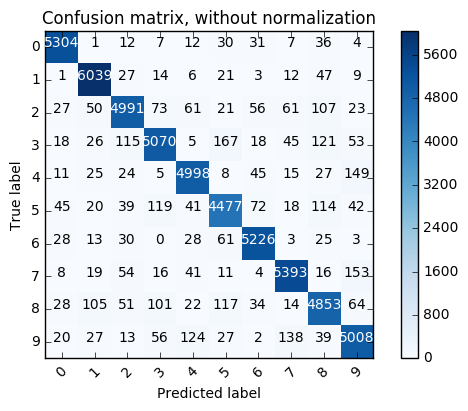

testing confusion matrix
Confusion matrix, without normalization


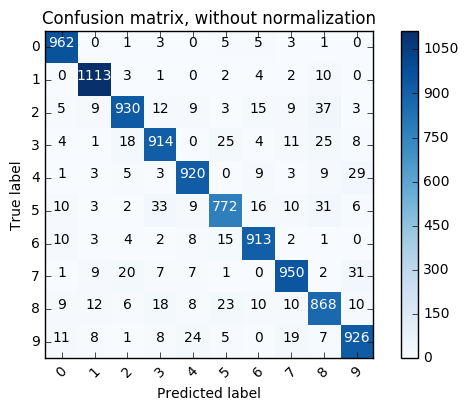

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=10)
class_names = [str(i) for i in range(10)]
# Plot non-normalized confusion matrix
print("training confusion matrix")
plt.figure()
plot_confusion_matrix(train_confuse, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

print("testing confusion matrix")
np.set_printoptions(precision=10)
class_names = [str(i) for i in range(10)]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(test_confuse, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

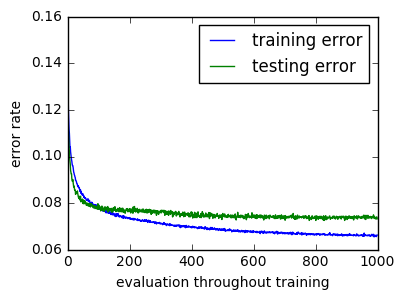

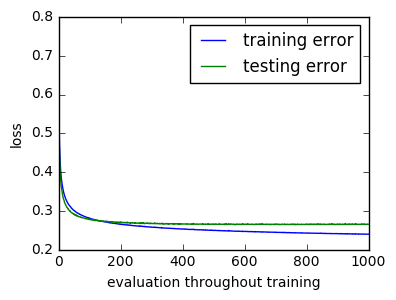

In [8]:
train_error_list = np.load("../models/TF_Linear_train_error_list.npy")
test_error_list = np.load("../models/TF_Linear_test_error_list.npy")
train_loss_list = np.load("../models/TF_Linear_train_loss_list.npy")
test_loss_list = np.load("../models/TF_Linear_test_loss_list.npy")


plt.figure(num=None, figsize=(4, 3), dpi=128, facecolor='w', edgecolor='k')
plt.plot(train_error_list)
plt.plot(test_error_list)
plt.xlabel("evaluation throughout training")
plt.ylabel("error rate")
plt.legend(["training error", "testing error"])
plt.show()


plt.figure(num=None, figsize=(4, 3), dpi=128, facecolor='w', edgecolor='k')
plt.plot(train_loss_list)
plt.plot(test_loss_list)
plt.xlabel("evaluation throughout training")
plt.ylabel("loss")
plt.legend(["training error", "testing error"])
plt.show()

In [9]:
print("""
\\begin{table}[H]
\t\\centering
\t\\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}
\t\t\\hline
\t\ttrain epoch\\textbackslash error & train error & test error \\\\
\t\t\\hline
""")
for i in range(10):
    print("\t\t{} & {:.4f} & {:.4f} \\\\".format(int(len(train_error_list) * i/10), train_error_list[int(len(train_error_list) * i/10)], test_error_list[int(len(train_error_list) * i/10)]))
    print("\t\t\\hline")
print("\t\t{} & {:.4f} & {:.4f} \\\\".format(len(train_error_list)-1, train_error_list[-1], test_error_list[-1]))
print("\t\t\\hline")
print("""
\t\\end{tabular}
\t\\caption{training and testing error}
\t\\label{tab:my_label}
\\end{table}
""")


\begin{table}[H]
	\centering
	\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}
		\hline
		train epoch\textbackslash error & train error & test error \\
		\hline

		0 & 0.1539 & 0.1451 \\
		\hline
		100 & 0.0783 & 0.0774 \\
		\hline
		200 & 0.0733 & 0.0763 \\
		\hline
		300 & 0.0711 & 0.0764 \\
		\hline
		400 & 0.0697 & 0.0752 \\
		\hline
		500 & 0.0688 & 0.0747 \\
		\hline
		600 & 0.0675 & 0.0740 \\
		\hline
		700 & 0.0668 & 0.0741 \\
		\hline
		800 & 0.0665 & 0.0740 \\
		\hline
		900 & 0.0662 & 0.0739 \\
		\hline
		999 & 0.0662 & 0.0732 \\
		\hline

	\end{tabular}
	\caption{training and testing error}
	\label{tab:my_label}
\end{table}

